In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('all.csv')

In [3]:
modern_nature = all_data[(all_data['type'] == 'Nature') & (all_data['age'] == 'Modern')]['content']
renaissance_love = all_data[(all_data['type'] == 'Love') & (all_data['age'] == 'Renaissance')]['content']
modern_love = all_data[(all_data['type'] == 'Love') & (all_data['age'] == 'Modern')]['content']
renaissance_nature = all_data[(all_data['type'] == 'Nature') & (all_data['age'] == 'Renaissance')]['content']

In [4]:
def plot_history(history):
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.title('Training accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()

In [5]:
def prepare_data(corpus):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  total_words = len(tokenizer.word_index) + 1

  # create input sequences using list of tokens
  input_sequences = []
  for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
      n_gram_sequence = token_list[:i+1]
      input_sequences.append(n_gram_sequence)

  # pad sequences 
  max_sequence_len = max([len(x) for x in input_sequences])
  input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

  # create predictors and label
  predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

  label = ku.to_categorical(label, num_classes=total_words)

  return tokenizer,total_words,max_sequence_len,predictors,label

In [6]:
def make_model(total_words,max_sequence_len):
  model = Sequential()
  model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
  model.add(Bidirectional(LSTM(120, return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(LSTM(96))
  model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dense(total_words, activation='softmax'))


  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
  )

  return model

In [2]:
def save_variable(name,variable):
    with open(name+'.pickle', 'wb') as handle:
        pickle.dump(variable, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_variable(name):
    with open(name+'.pickle', 'rb') as handle:
        variable = pickle.load(handle)
    return variable

In [8]:
corpus = []
for line in modern_nature:
  corpus.extend(line.lower().split('\r\n'))

tokenizer,total_words,max_sequence_len,predictors,label  = prepare_data(corpus)

model = make_model(total_words,max_sequence_len)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 85, 128)           516352    
_________________________________________________________________
bidirectional (Bidirectional (None, 85, 240)           239040    
_________________________________________________________________
dropout (Dropout)            (None, 85, 240)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense (Dense)                (None, 2017)              195649    
_________________________________________________________________
dense_1 (Dense)              (None, 4034)              8140612   
Total params: 9,221,061
Trainable params: 9,221,061
Non-trainable params: 0
______________________________________________

In [9]:
 history = model.fit(predictors, label, epochs=110, verbose=1)

Epoch 1/110
446/446 [==============================] - 9s 20ms/step - loss: 7.1677 - accuracy: 0.0757
Epoch 2/110
446/446 [==============================] - 9s 19ms/step - loss: 6.6761 - accuracy: 0.0765
Epoch 3/110
446/446 [==============================] - 8s 19ms/step - loss: 6.4913 - accuracy: 0.0795
Epoch 4/110
446/446 [==============================] - 9s 19ms/step - loss: 6.3330 - accuracy: 0.0918
Epoch 5/110
446/446 [==============================] - 9s 19ms/step - loss: 6.2071 - accuracy: 0.1032
Epoch 6/110
446/446 [==============================] - 9s 19ms/step - loss: 6.0858 - accuracy: 0.1066
Epoch 7/110
446/446 [==============================] - 9s 20ms/step - loss: 5.9621 - accuracy: 0.1090
Epoch 8/110
446/446 [==============================] - 9s 20ms/step - loss: 5.8441 - accuracy: 0.1139
Epoch 9/110
446/446 [==============================] - 9s 20ms/step - loss: 5.7470 - accuracy: 0.1186
Epoch 10/110
446/446 [==============================] - 9s 20ms/step - loss: 5.647

446/446 [==============================] - 10s 23ms/step - loss: 1.9620 - accuracy: 0.6453
Epoch 81/110
446/446 [==============================] - 10s 23ms/step - loss: 1.9402 - accuracy: 0.6471
Epoch 82/110
446/446 [==============================] - 10s 23ms/step - loss: 1.9151 - accuracy: 0.6560
Epoch 83/110
446/446 [==============================] - 10s 23ms/step - loss: 1.8915 - accuracy: 0.6587
Epoch 84/110
446/446 [==============================] - 10s 23ms/step - loss: 1.8706 - accuracy: 0.6656
Epoch 85/110
446/446 [==============================] - 10s 23ms/step - loss: 1.8566 - accuracy: 0.6685
Epoch 86/110
446/446 [==============================] - 10s 23ms/step - loss: 1.8228 - accuracy: 0.6746
Epoch 87/110
446/446 [==============================] - 10s 23ms/step - loss: 1.8082 - accuracy: 0.6723
Epoch 88/110
446/446 [==============================] - 10s 23ms/step - loss: 1.7972 - accuracy: 0.6770
Epoch 89/110
446/446 [==============================] - 10s 23ms/step - loss:

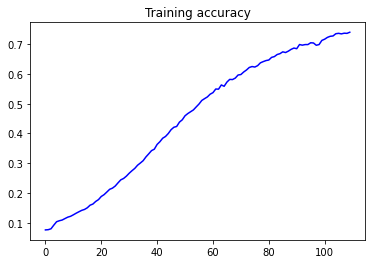

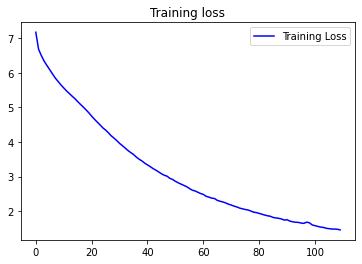

In [10]:
plot_history(history)

In [9]:
save_variable('modern_nature_max_sequence_len',max_sequence_len)

In [12]:
model.save('modern_nature.h5')
save_variable('modern_nature_tokenizer',tokenizer)
save_variable('modern_nature_max_sequence_len',max_sequence_len)

del corpus
del model
del predictors
del label

NameError: name 'model' is not defined

In [13]:
del label

In [10]:
corpus = []
for line in renaissance_love:
  corpus.extend(line.lower().split('\r\n'))

tokenizer,total_words,max_sequence_len,predictors,label  = prepare_data(corpus)

model = make_model(total_words,max_sequence_len)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 128)           740480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 26, 240)           239040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 240)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense_2 (Dense)              (None, 2892)              280524    
_________________________________________________________________
dense_3 (Dense)              (None, 5785)              16736005  
Total params: 18,125,457
Trainable params: 18,125,457
Non-trainable params: 0
__________________________________________

In [15]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
1023/1023 [==============================] - 14s 14ms/step - loss: 7.0968 - accuracy: 0.0233
Epoch 2/100
1023/1023 [==============================] - 14s 14ms/step - loss: 6.7738 - accuracy: 0.0255
Epoch 3/100
1023/1023 [==============================] - 14s 14ms/step - loss: 6.6287 - accuracy: 0.0299
Epoch 4/100
1023/1023 [==============================] - 14s 13ms/step - loss: 6.5275 - accuracy: 0.0320
Epoch 5/100
1023/1023 [==============================] - 13s 13ms/step - loss: 6.4472 - accuracy: 0.0336
Epoch 6/100
1023/1023 [==============================] - 14s 13ms/step - loss: 6.3770 - accuracy: 0.0354
Epoch 7/100
1023/1023 [==============================] - 14s 14ms/step - loss: 6.3118 - accuracy: 0.0371
Epoch 8/100
1023/1023 [==============================] - 14s 14ms/step - loss: 6.2422 - accuracy: 0.0395
Epoch 9/100
1023/1023 [==============================] - 15s 14ms/step - loss: 6.1681 - accuracy: 0.0422
Epoch 10/100
1023/1023 [==============================]

1023/1023 [==============================] - 18s 18ms/step - loss: 2.4984 - accuracy: 0.5237
Epoch 78/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.4586 - accuracy: 0.5331
Epoch 79/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.4489 - accuracy: 0.5356
Epoch 80/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.4275 - accuracy: 0.5383
Epoch 81/100
1023/1023 [==============================] - 18s 17ms/step - loss: 2.4041 - accuracy: 0.5433
Epoch 82/100
1023/1023 [==============================] - 18s 17ms/step - loss: 2.3904 - accuracy: 0.5461
Epoch 83/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.3628 - accuracy: 0.5539
Epoch 84/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.3582 - accuracy: 0.5499
Epoch 85/100
1023/1023 [==============================] - 18s 18ms/step - loss: 2.3305 - accuracy: 0.5562
Epoch 86/100
1023/1023 [==============================] - 1

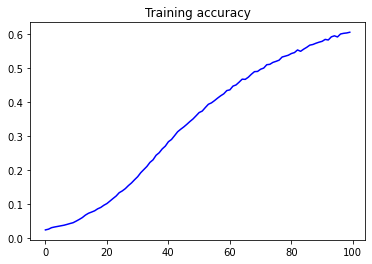

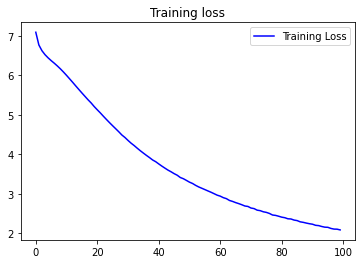

In [16]:
plot_history(history)

In [11]:
save_variable('renaissance_love_max_sequence_len',max_sequence_len)

In [17]:
model.save('renaissance_love.h5')
save_variable('renaissance_love_tokenizer')
save_variable('renaissance_love_max_sequence_len',max_sequence_len)

del corpus
del model
del predictors
del label

In [12]:
corpus = []
for line in modern_love:
  corpus.extend(line.lower().split('\r\n'))

tokenizer,total_words,max_sequence_len,predictors,label  = prepare_data(corpus)

model = make_model(total_words,max_sequence_len)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 52, 128)           353408    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 52, 240)           239040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 52, 240)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense_4 (Dense)              (None, 1380)              133860    
_________________________________________________________________
dense_5 (Dense)              (None, 2761)              3812941   
Total params: 4,668,657
Trainable params: 4,668,657
Non-trainable params: 0
____________________________________________

In [19]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
291/291 [==============================] - 5s 17ms/step - loss: 7.1083 - accuracy: 0.0555
Epoch 2/100
291/291 [==============================] - 5s 17ms/step - loss: 6.5124 - accuracy: 0.0579
Epoch 3/100
291/291 [==============================] - 5s 17ms/step - loss: 6.3289 - accuracy: 0.0598
Epoch 4/100
291/291 [==============================] - 5s 17ms/step - loss: 6.1891 - accuracy: 0.0700
Epoch 5/100
291/291 [==============================] - 5s 17ms/step - loss: 6.0888 - accuracy: 0.0721
Epoch 6/100
291/291 [==============================] - 5s 18ms/step - loss: 5.9938 - accuracy: 0.0792
Epoch 7/100
291/291 [==============================] - 5s 18ms/step - loss: 5.9080 - accuracy: 0.0839
Epoch 8/100
291/291 [==============================] - 5s 17ms/step - loss: 5.8130 - accuracy: 0.0890
Epoch 9/100
291/291 [==============================] - 5s 18ms/step - loss: 5.7186 - accuracy: 0.0887
Epoch 10/100
291/291 [==============================] - 5s 18ms/step - loss: 5.642

291/291 [==============================] - 5s 17ms/step - loss: 2.1959 - accuracy: 0.5719
Epoch 81/100
291/291 [==============================] - 5s 16ms/step - loss: 2.1628 - accuracy: 0.5773
Epoch 82/100
291/291 [==============================] - 5s 16ms/step - loss: 2.1503 - accuracy: 0.5859
Epoch 83/100
291/291 [==============================] - 5s 18ms/step - loss: 2.1192 - accuracy: 0.5871
Epoch 84/100
291/291 [==============================] - 5s 17ms/step - loss: 2.0921 - accuracy: 0.5976
Epoch 85/100
291/291 [==============================] - 5s 17ms/step - loss: 2.0896 - accuracy: 0.5975
Epoch 86/100
291/291 [==============================] - 5s 17ms/step - loss: 2.0569 - accuracy: 0.6024
Epoch 87/100
291/291 [==============================] - 5s 17ms/step - loss: 2.0398 - accuracy: 0.6067
Epoch 88/100
291/291 [==============================] - 5s 18ms/step - loss: 2.0141 - accuracy: 0.6107
Epoch 89/100
291/291 [==============================] - 5s 17ms/step - loss: 1.9900 - 

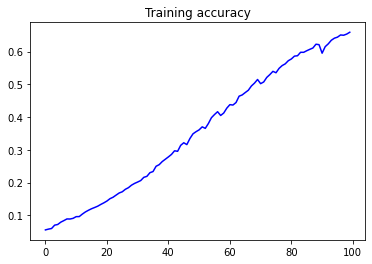

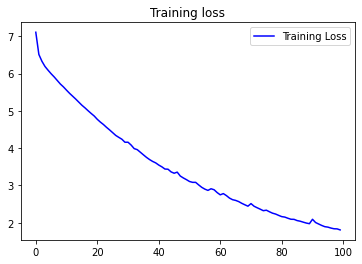

In [20]:
plot_history(history)

In [13]:
save_variable('modern_love_max_sequence_len',max_sequence_len)

In [21]:
model.save('modern_love.h5')
save_variable('modern_love_tokenizer')
save_variable('modern_love_max_sequence_len',max_sequence_len)

del corpus
del model
del predictors
del label

In [14]:
corpus = []
for line in renaissance_nature:
  corpus.extend(line.lower().split('\r\n'))

tokenizer,total_words,max_sequence_len,predictors,label  = prepare_data(corpus)

model = make_model(total_words,max_sequence_len)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 84, 128)           421248    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 84, 240)           239040    
_________________________________________________________________
dropout_3 (Dropout)          (None, 84, 240)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense_6 (Dense)              (None, 1645)              159565    
_________________________________________________________________
dense_7 (Dense)              (None, 3291)              5416986   
Total params: 6,366,247
Trainable params: 6,366,247
Non-trainable params: 0
____________________________________________

In [23]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
334/334 [==============================] - 7s 22ms/step - loss: 7.2577 - accuracy: 0.0320
Epoch 2/100
334/334 [==============================] - 7s 22ms/step - loss: 6.7318 - accuracy: 0.0328
Epoch 3/100
334/334 [==============================] - 7s 21ms/step - loss: 6.5995 - accuracy: 0.0357
Epoch 4/100
334/334 [==============================] - 7s 22ms/step - loss: 6.4935 - accuracy: 0.0358
Epoch 5/100
334/334 [==============================] - 8s 23ms/step - loss: 6.4154 - accuracy: 0.0382
Epoch 6/100
334/334 [==============================] - 7s 22ms/step - loss: 6.3533 - accuracy: 0.0391
Epoch 7/100
334/334 [==============================] - 8s 23ms/step - loss: 6.2944 - accuracy: 0.0400
Epoch 8/100
334/334 [==============================] - 8s 23ms/step - loss: 6.2353 - accuracy: 0.0412
Epoch 9/100
334/334 [==============================] - 8s 22ms/step - loss: 6.1671 - accuracy: 0.0424
Epoch 10/100
334/334 [==============================] - 7s 22ms/step - loss: 6.095

334/334 [==============================] - 7s 21ms/step - loss: 1.8874 - accuracy: 0.6641 0s - loss: 1.8880 - accuracy: 0.
Epoch 81/100
334/334 [==============================] - 7s 21ms/step - loss: 1.8724 - accuracy: 0.6646
Epoch 82/100
334/334 [==============================] - 7s 21ms/step - loss: 1.8383 - accuracy: 0.6718
Epoch 83/100
334/334 [==============================] - 7s 22ms/step - loss: 1.8318 - accuracy: 0.6732
Epoch 84/100
334/334 [==============================] - 7s 22ms/step - loss: 1.8101 - accuracy: 0.6768
Epoch 85/100
334/334 [==============================] - 7s 22ms/step - loss: 1.7907 - accuracy: 0.6817
Epoch 86/100
334/334 [==============================] - 7s 22ms/step - loss: 1.7716 - accuracy: 0.6822
Epoch 87/100
334/334 [==============================] - 7s 22ms/step - loss: 1.7374 - accuracy: 0.6951
Epoch 88/100
334/334 [==============================] - 7s 21ms/step - loss: 1.6997 - accuracy: 0.7034
Epoch 89/100
334/334 [==============================]

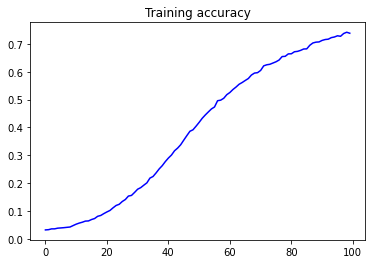

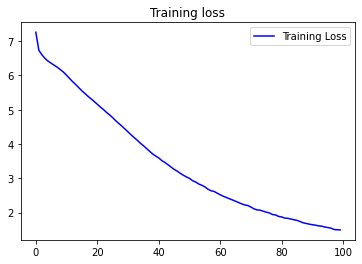

In [24]:
plot_history(history)

In [15]:
save_variable('renaissance_nature_max_sequence_len',max_sequence_len)

In [25]:
model.save('renaissance_nature.h5')
save_variable('renaissance_nature_tokenizer')
save_variable('renaissance_nature_max_sequence_len',max_sequence_len)

del corpus
del model
del predictors
del label

In [3]:
models = ['modern_nature','renaissance_love','modern_love','renaissance_nature']

In [22]:
def predict(model_name,seed_text,next_words):
    model = load_model(model_name + '.h5')
    tokenizer = load_variable(model_name+'_tokenizer')
    max_sequence_len = load_variable(model_name +'_max_sequence_len')
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word 
        
    temp_seed_text = seed_text.split(" ")
    pred = ''
    for i in range(0,len(temp_seed_text),8):
        pred += ' '.join(temp_seed_text[i:i+8]) + '\n'
#     return seed_text
    return pred

In [26]:
print(predict('modern_love','The time has come',52))

The time has come through the day birds
of a table board horse the estate of
stephen spender to fell of an around baby
back his forehead reprinted by the trustees for
the e e cummings trust copyright 1985 by
george james firmage reprinted with the permission of
liveright publishing corporation copyright 1986 by marc simon



In [24]:
predict('modern_nature','This is a season',52)

'This is a season singing in his lord\npaleth borne bird winds say gone your back\nand this hill to wood keep on slow\nflame past three states from the yser his\nbronze ears listening to the mumbled roar of\nthe city at his bronze feet will will\ntake it and a dip to the mockingbird\n'